In [1]:
#Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

## Exploratory Analysis of PIMA Diabetes Dataset

In [2]:
#Loading the dataset to a dataframe
diabetes_df = pd.read_csv('diabetes.csv')
diabetes_df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
#Checking for Nan Values
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [4]:
#Checking the shape of the dataframe
diabetes_df.shape

(768, 9)

In [5]:
#Checking the datatype of the columns in the dataset
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#Checking the statistical measure of the data
diabetes_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [7]:
#Checking the number of values present in the dataframe for each label
diabetes_df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

#### 0 -- Non-diabetic
#### 1 -- Diabetic

In [8]:
diabetes_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

[Text(0.5, 0, 'Pregnancies'),
 Text(1.5, 0, 'Glucose'),
 Text(2.5, 0, 'BloodPressure'),
 Text(3.5, 0, 'SkinThickness'),
 Text(4.5, 0, 'Insulin'),
 Text(5.5, 0, 'BMI'),
 Text(6.5, 0, 'DiabetesPedigreeFunction'),
 Text(7.5, 0, 'Age'),
 Text(8.5, 0, 'Outcome')]

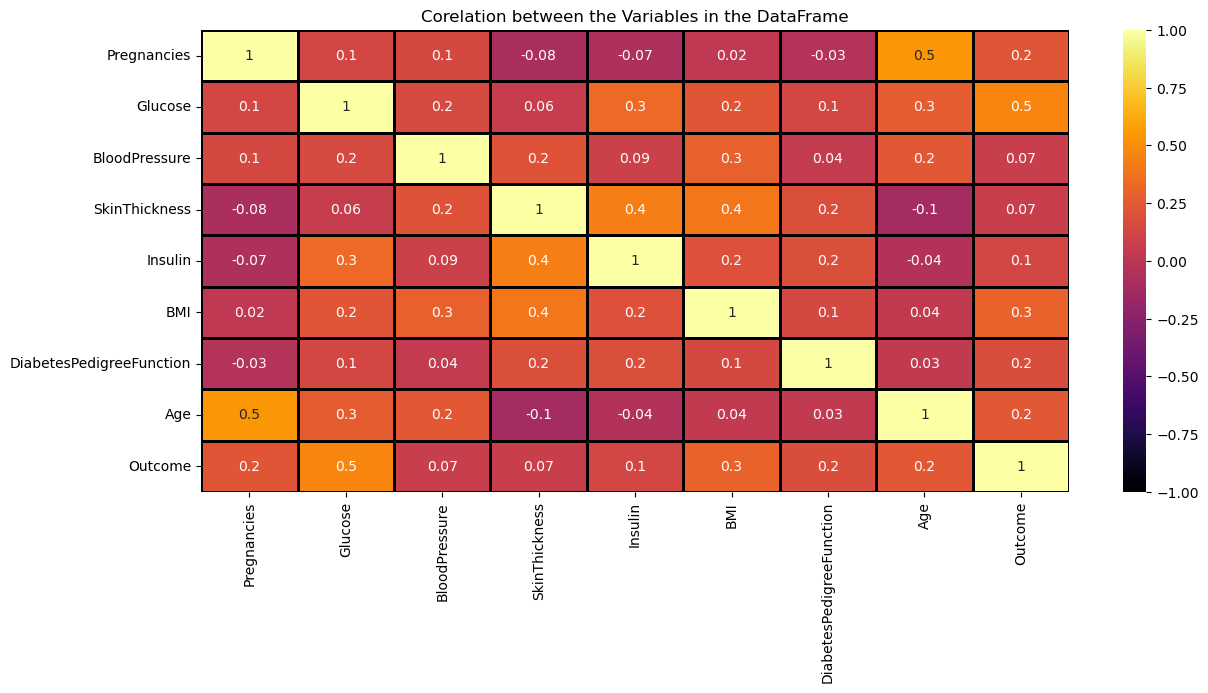

In [9]:
#View the correlation of the df
corr_df = diabetes_df.corr(method = 'pearson')
plt.figure(figsize = (14,6))
heatmap = sns.heatmap(corr_df, annot = True, fmt = '.1g', vmin = -1, vmax = 1, center = 0, cmap = 'inferno', linewidths = 1, linecolor = 'Black')
heatmap.set_title('Corelation between the Variables in the DataFrame')
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation= 90)

The Variable that is the most positively correlated with outcome is Glucose with a corr of 0.5, followed by BMI with a corr of 0.3.
There is the possiblity that the Higher the Glucose level of an individual, the more prone they are to developing Diabetes

In [10]:
#Viewing the mean values for the positive and negative labels
diabetes_df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


The mean values is in agreement with the heatmap before, it can be seen here, that the mean Glucose level, BMI, Age and Insulin is higher for those with Diabetes than those without it.

## Model Building

In [11]:
#Splitting the dataframe into features and labels
X = diabetes_df.drop(columns = 'Outcome', axis = 1)
y = diabetes_df['Outcome']

In [12]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [13]:
print(y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Data Preprocessing

In [14]:
#Standardizing the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Print the mean and Std of the transformed and data to verify scaling
print(f"The mean of the Standardized data is: {np.mean(X_scaled)}, std: {np.std(X_scaled)}")

The mean of the Standardized data is: 8.86154575644819e-17, std: 1.0


In [15]:
#Splitting the data into training and test dataset
SEED = 1
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, stratify = y, random_state = SEED)

In [16]:
print(X_scaled.shape, X_train.shape, X_test.shape, y.shape, y_train.shape, y_test.shape)

(768, 8) (576, 8) (192, 8) (768,) (576,) (192,)


### Training the Model

In [17]:
#Inititating the Model
classifier = svm.SVC(kernel = 'linear')

In [18]:
#Training the classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

## Model Evaluation

### Accuracy Score

In [19]:
# accuracy_score on the training data
X_train_pred =  classifier.predict(X_train)
X_train_acc = accuracy_score(X_train_pred, y_train)
print(f"The accuracy of the model on the training data is: {X_train_acc}")


The accuracy of the model on the training data is: 0.7795138888888888


In [20]:
#accuracy_score on the test data
X_test_pred = classifier.predict(X_test)
X_test_acc = accuracy_score(X_test_pred, y_test)
print(f"The accuracy of the model on the test data is: {X_test_acc}")

The accuracy of the model on the test data is: 0.78125


.

## Making a Prediction System

In [21]:
#Inputing a known row (Lableled as a Non-Diabetic) from our data to the model to see if it will correctly predict the label
data_input = (4,110,92,0,0,37.6,0.191,30,)

#Converting the data_input to a numpy array
numpy_data_input = np.asarray(data_input)

#Reshape the array, because we are predicting just one instance
data_input_reshaped = numpy_data_input.reshape(1,-1)


#Scale the data because the data used ot train the model was scaled

scaled_data = scaler.transform(data_input_reshaped)

#Make the prediction
prediction = classifier.predict(scaled_data)
print(prediction)

if (prediction == 0):
    print('The Individual is Non-Diabetic')
else:
    print('The Individual is Diabetic')

[0]
The Individual is Non-Diabetic


/home/ladiyusuph/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [22]:
#Inputing a known row (Lableled as a Diabetic) from our data to the model to see if it will correctly predict the label
data_input = (1,189,60,23,846,30.1,0.398,59,)

#Converting the data_input to a numpy array
numpy_data_input = np.asarray(data_input)

#Reshape the array, because we are predicting just one instance
data_input_reshaped = numpy_data_input.reshape(1,-1)


#Scale the data because the data used ot train the model was scaled

scaled_data = scaler.transform(data_input_reshaped)

#Make the prediction
prediction = classifier.predict(scaled_data) 
print(prediction)

if (prediction == 0):
    print('The Individual is Non-Diabetic')
else:
    print('The Individual is Diabetic')

[1]
The Individual is Diabetic


/home/ladiyusuph/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


#### The Model Was able to correctly label the input data